In [1]:
import pennylane as qml
from pennylane import numpy as np

In [3]:
wires = 2  # Number of qubits

dev = qml.device("braket.local.qubit", wires=wires)

In [4]:
@qml.qnode(dev)
def circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(1))

In [5]:
params = np.array([0.1, 0.2])
print("Expectation value of circuit:", circuit(params))

Expectation value of circuit: 0.9751703272018158


In [7]:
print("Drawing of circuit:\n")
print(circuit.draw())

Drawing of circuit:

 0: ──RX(0.1)──╭C──┤     
 1: ──RY(0.2)──╰X──┤ ⟨Z⟩ 



In [9]:
dcircuit = qml.grad(circuit)
dcircuit(params)

(array([-0.0978434 , -0.19767681]),)

In [10]:
opt = qml.GradientDescentOptimizer(stepsize=0.2)

Minimized circuit output: -0.9999996577749632
Optimized parameters: [4.19618503e-04 3.14087965e+00]


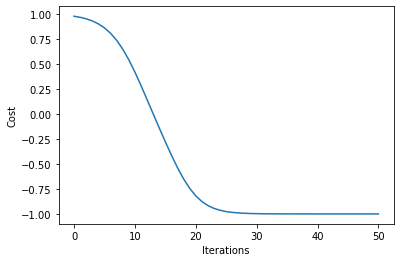

In [11]:
iterations = 50

costs = []

for i in range(iterations):
    params, cost = opt.step_and_cost(circuit, params)
    costs.append(cost)

# Visualize results
import matplotlib.pyplot as plt    
costs.append(circuit(params))
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")

print("Minimized circuit output:", circuit(params))
print("Optimized parameters:", params)

In [12]:
device_arn = "arn:aws:braket:::device/quantum-simulator/amazon/sv1"

# Please enter the S3 bucket you created during onboarding
# (or any other S3 bucket starting with 'amazon-braket-' in your account) in the code below

my_bucket = f"amazon-braket-c96f26897106" # the name of the bucket
my_prefix = "quantum-experiments" # the name of the folder in the bucket
s3_folder = (my_bucket, my_prefix)

In [13]:
dev = qml.device('braket.aws.qubit', device_arn=device_arn, wires=2, s3_destination_folder=s3_folder)

In [14]:
@qml.qnode(dev)
def circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.CNOT(wires=[0, 1])
    return qml.expval(qml.PauliZ(1))


dcircuit = qml.grad(circuit)

print("Result of circuit run on SV1:", circuit(params))

Result of circuit run on SV1: -0.9999996577749632
Result of gradient calculation on SV1: (array([ 0.00041962, -0.000713  ]),)
